<a href="https://colab.research.google.com/github/ashwingeeni12/data_science_fundamentals/blob/main/Unit_4/AshwinGeeniU4Projecf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

For my project I will be comparing the amount of first kills the 4 different region in pro valorant during the champions tournament, the biggest of the year. The 4 regions are Americas, abberviated to A; Europe Middle East and Africa, abberviated to EMEA; Asia Pacific, abbreviated to APAC; and China, abberviated to CN. I hope to find any insights as to how first kills for each region look compared to each other and more specificly how first kills can be related to the actual events that occured in that tournament.

Just for context valorant is a 5v5 fps where the goal is to kill all the players on the other team or complete the objective and the first to do this 13 times wins, each time is called a round. The first kill is the first kill that occurs in that round. It is important as it turns numbers in your favor and can change the momentum of the round.

# Import and Data Sort

In [41]:
!pip install "preliz[full,notebook]"

In [42]:
import preliz as pz
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

In [43]:
#Just getting the CSV

url_csv = "https://raw.githubusercontent.com/ashwingeeni12/data_science_fundamentals/refs/heads/main/Unit_3/players_stats.csv"

all_players = pd.read_csv(url_csv)

In [44]:
#extracting the players specifically from that one tournament

all_players = all_players.query('Tournament == "Valorant Champions 2023" & Stage != "All Stages"')

all_players

,Tournament,Stage,Match Type,Player,Teams,Agents,Rounds Played,Rating,Average Combat Score,Kills:Deaths,...,First Deaths Per Round,Headshot %,Clutch Success %,Clutches (won/played),Maximum Kills in a Single Map,Kills,Deaths,Assists,First Kills,First Deaths
1103,Valorant Champions 2023,Playoffs,Upper Quarterfinals,Knight,Bilibili Gaming,breach,22,0.99,169.0,1.00,...,0.14,34%,NaN,0/4,13,13,13,10,1,3
1104,Valorant Champions 2023,Playoffs,Upper Quarterfinals,Knight,Bilibili Gaming,omen,23,0.90,182.0,0.88,...,0.13,30%,NaN,0/2,14,14,16,10,1,3
1105,Valorant Champions 2023,Playoffs,Upper Quarterfinals,Knight,Bilibili Gaming,"breach, omen",45,0.94,176.0,0.93,...,0.13,32%,NaN,0/6,14,27,29,20,2,6
1106,Valorant Champions 2023,Playoffs,Upper Quarterfinals,whzy,Bilibili Gaming,raze,23,1.26,257.0,1.47,...,0.26,16%,NaN,0/4,22,22,15,2,2,6
1107,Valorant Champions 2023,Playoffs,Upper Quarterfinals,whzy,Bilibili Gaming,jett,22,0.81,216.0,0.81,...,0.27,28%,NaN,0/1,17,17,21,1,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,Valorant Champions 2023,Group Stage,Decider (D),cNed,Natus Vincere,"jett, neon",72,1.05,249.0,1.21,...,0.14,29%,NaN,0/5,24,63,52,12,12,10
2004,Valorant Champions 2023,Group Stage,Decider (D),Shao,Natus Vincere,astra,24,0.81,98.0,0.64,...,0.08,33%,50%,6-Mar,9,9,14,11,0,2
2005,Valorant Champions 2023,Group Stage,Decider (D),Shao,Natus Vincere,fade,24,1.05,180.0,0.94,...,0.08,33%,43%,7-Mar,16,16,17,12,0,2
2006,Valorant Champions 2023,Group Stage,Decider (D),Shao,Natus Vincere,skye,24,0.74,96.0,0.47,...,0.04,30%,NaN,0/6,7,7,15,10,2,1


(array([264., 283., 160.,  98.,  46.,  21.,  18.,   9.,   3.,   3.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

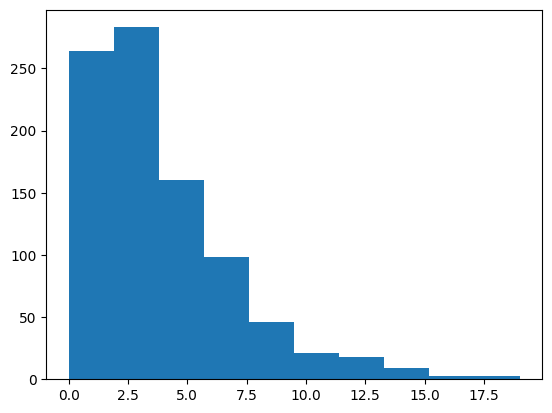

In [45]:
#plotting histogram to make sure data can work
plt.hist(all_players['First Kills'])

In [46]:
#this data set has entries where it combines 2 games into 1 entry as 1 pro game is a set of 3 this helps remove those as we are looking at single games
players = np.zeros_like(all_players.Player)

for index, player in enumerate(all_players.Agents):
  if ',' not in player:
    players[index] = 1

players.sum()

players

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,

In [47]:
all_players = all_players.loc[players == True]
all_players.reset_index(drop = True, inplace = True)
all_players

,Tournament,Stage,Match Type,Player,Teams,Agents,Rounds Played,Rating,Average Combat Score,Kills:Deaths,...,First Deaths Per Round,Headshot %,Clutch Success %,Clutches (won/played),Maximum Kills in a Single Map,Kills,Deaths,Assists,First Kills,First Deaths
0,Valorant Champions 2023,Playoffs,Upper Quarterfinals,Knight,Bilibili Gaming,breach,22,0.99,169.0,1.00,...,0.14,34%,NaN,0/4,13,13,13,10,1,3
1,Valorant Champions 2023,Playoffs,Upper Quarterfinals,Knight,Bilibili Gaming,omen,23,0.90,182.0,0.88,...,0.13,30%,NaN,0/2,14,14,16,10,1,3
2,Valorant Champions 2023,Playoffs,Upper Quarterfinals,whzy,Bilibili Gaming,raze,23,1.26,257.0,1.47,...,0.26,16%,NaN,0/4,22,22,15,2,2,6
3,Valorant Champions 2023,Playoffs,Upper Quarterfinals,whzy,Bilibili Gaming,jett,22,0.81,216.0,0.81,...,0.27,28%,NaN,0/1,17,17,21,1,5,6
4,Valorant Champions 2023,Playoffs,Upper Quarterfinals,Biank,Bilibili Gaming,sova,22,1.19,266.0,1.06,...,0.05,24%,NaN,0/3,18,18,17,12,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Valorant Champions 2023,Group Stage,Decider (D),cNed,Natus Vincere,neon,24,1.11,276.0,1.33,...,0.13,32%,NaN,0/2,24,24,18,4,6,3
643,Valorant Champions 2023,Group Stage,Decider (D),cNed,Natus Vincere,jett,48,1.02,236.0,1.15,...,0.15,27%,NaN,0/3,21,39,34,8,6,7
644,Valorant Champions 2023,Group Stage,Decider (D),Shao,Natus Vincere,astra,24,0.81,98.0,0.64,...,0.08,33%,50%,6-Mar,9,9,14,11,0,2
645,Valorant Champions 2023,Group Stage,Decider (D),Shao,Natus Vincere,fade,24,1.05,180.0,0.94,...,0.08,33%,43%,7-Mar,16,16,17,12,0,2


In [48]:
#My region column isn't built in so i made my own based on the team they were apart of

all_players['Region'] = ''

for index, team in enumerate(all_players["Teams"]):
    if (team == "Evil Geniuses" or team == "NRG Esports" or team == "LOUD" or team == "KRÜ Esports"):
        all_players['Region'][index] = "A"
    elif (team == "FNATIC" or team == "Team Liquid" or team == "FUT Esports" or team == "Giants Gaming" or team == "Natus Vincere"):
        all_players['Region'][index] = "EMEA"
    elif (team == "Paper Rex" or team == "DRX" or team == "T1" or team == "ZETA DIVISION"):
        all_players['Region'][index] = "APAC"
    elif (team == "EDward Gaming" or team == "Bilibili Gaming" or team == "FunPlus Phoenix"):
        all_players['Region'][index] = "CN"

all_players

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  all_players['Region'][index] = "CN"
<ipython-input-48-cef4b08ffc31>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_players['Region'][index] = "CN"
<ipython-input-48-cef4b08ffc31>:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when yo

,Tournament,Stage,Match Type,Player,Teams,Agents,Rounds Played,Rating,Average Combat Score,Kills:Deaths,...,Headshot %,Clutch Success %,Clutches (won/played),Maximum Kills in a Single Map,Kills,Deaths,Assists,First Kills,First Deaths,Region
0,Valorant Champions 2023,Playoffs,Upper Quarterfinals,Knight,Bilibili Gaming,breach,22,0.99,169.0,1.00,...,34%,NaN,0/4,13,13,13,10,1,3,CN
1,Valorant Champions 2023,Playoffs,Upper Quarterfinals,Knight,Bilibili Gaming,omen,23,0.90,182.0,0.88,...,30%,NaN,0/2,14,14,16,10,1,3,CN
2,Valorant Champions 2023,Playoffs,Upper Quarterfinals,whzy,Bilibili Gaming,raze,23,1.26,257.0,1.47,...,16%,NaN,0/4,22,22,15,2,2,6,CN
3,Valorant Champions 2023,Playoffs,Upper Quarterfinals,whzy,Bilibili Gaming,jett,22,0.81,216.0,0.81,...,28%,NaN,0/1,17,17,21,1,5,6,CN
4,Valorant Champions 2023,Playoffs,Upper Quarterfinals,Biank,Bilibili Gaming,sova,22,1.19,266.0,1.06,...,24%,NaN,0/3,18,18,17,12,1,1,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Valorant Champions 2023,Group Stage,Decider (D),cNed,Natus Vincere,neon,24,1.11,276.0,1.33,...,32%,NaN,0/2,24,24,18,4,6,3,EMEA
643,Valorant Champions 2023,Group Stage,Decider (D),cNed,Natus Vincere,jett,48,1.02,236.0,1.15,...,27%,NaN,0/3,21,39,34,8,6,7,EMEA
644,Valorant Champions 2023,Group Stage,Decider (D),Shao,Natus Vincere,astra,24,0.81,98.0,0.64,...,33%,50%,6-Mar,9,9,14,11,0,2,EMEA
645,Valorant Champions 2023,Group Stage,Decider (D),Shao,Natus Vincere,fade,24,1.05,180.0,0.94,...,33%,43%,7-Mar,16,16,17,12,0,2,EMEA


In [49]:
#setting it as type category so i can do the coords

new_players = all_players
new_players['Region'] = new_players['Region'].astype('category')

<ipython-input-49-59d94b551189>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_players['Region'] = new_players['Region'].astype('category')


In [50]:
reg_idx = new_players.Region.cat.codes.values

reg_codes = new_players.Region.cat.categories

reg_coords_new = {"reg": reg_codes}

reg_coords_new

{'reg': Index(['A', 'APAC', 'CN', 'EMEA'], dtype='object')}

# Non-Hierarchical Models

Last unit I did my project on a single player so I am using the same priors and likelihood as I modeled the same stat, First Kills. For this I increased my nu prior to have a lower of 5 and upper of 10 instead of 3 and 7 because I want to have a higher variance, due to my data including more players

In [51]:
with pm.Model(coords=reg_coords_new) as model_valHalfStudentT:

    ν = pm.Uniform('ν', lower = 5., upper = 10., dims = "reg")

    σ = pm.Logistic('σ', mu = 4., s = .5, dims = "reg")

    Y = pm.HalfStudentT('Y', nu = ν[reg_idx], sigma = σ[reg_idx], observed = all_players['First Kills'].values)

    data = pm.sample()

Output()

Output()

Output()

(0.0, 24.0)

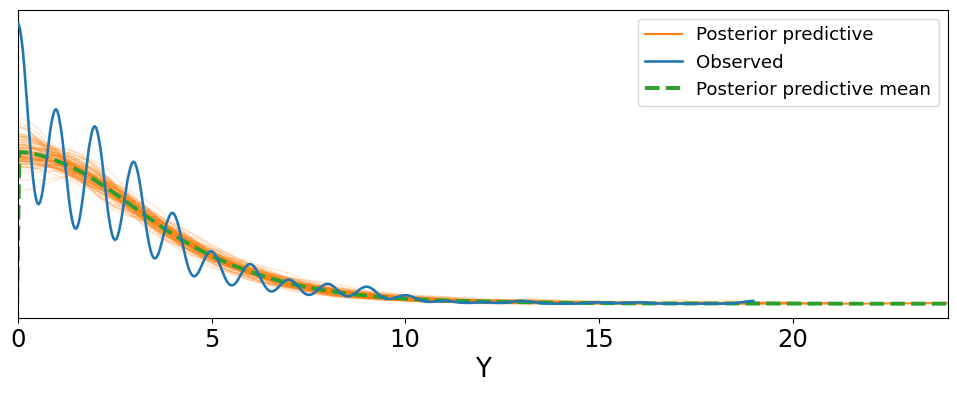

In [52]:
pm.sample_posterior_predictive(data, model=model_valHalfStudentT, extend_inferencedata=True)
ppc = az.plot_ppc(data, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C2"])
ppc.set_xlim(0, 24)

So why it look like this, well my data is a discrete data set using only number greater than or equal to 0. In the last project I was able to use continuous because the data was grouped nicely as I was looking at a specific player so the variance would be lower compared to the roughly 90 players I am looking at. So I will need to use a discete model now. The first one that came to mind is Poisson.

Last Unit i tried out the poisson model so I am just going to use the same prior i used there but change the mu to make it smaller because I think the data has a higher variance.

In [53]:
with pm.Model(coords=reg_coords_new) as model_valPoisson:

    μ = pm.Logistic('μ', mu = 4., s = .5, dims = "reg")

    Y = pm.Poisson('Y', mu = μ[reg_idx], observed = all_players['First Kills'].values)

    p_data = pm.sample()

Output()

Output()

Output()

(0.0, 24.0)

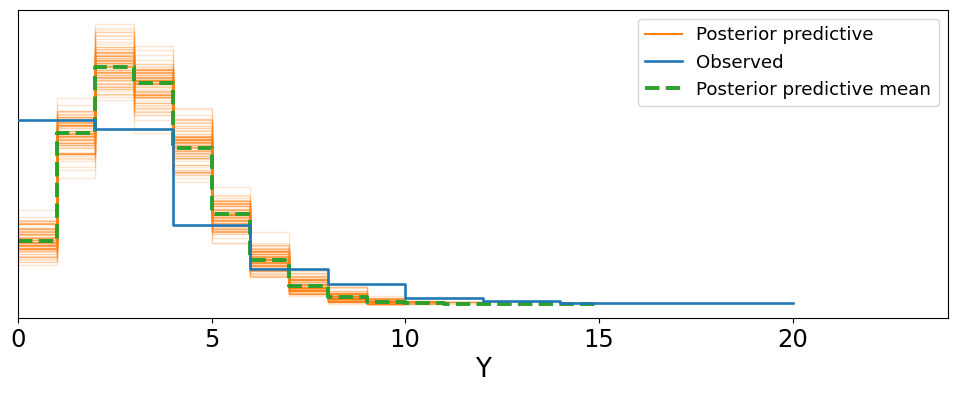

In [54]:
pm.sample_posterior_predictive(p_data, model=model_valPoisson, extend_inferencedata=True)
ppc = az.plot_ppc(p_data, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C2"])
ppc.set_xlim(0, 24)

array([<Axes: >], dtype=object)

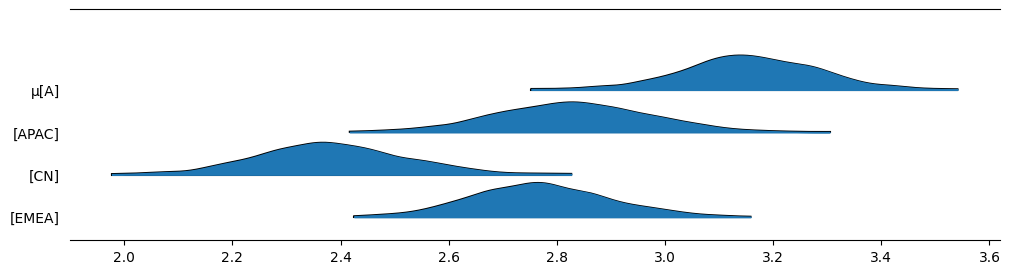

In [55]:
az.plot_forest(p_data, var_names=['μ'], combined=True, figsize=(12, 3), kind = 'ridgeplot', hdi_prob=0.998)

This doesn't line up with my obsevred as the ppm is taking a parabolic shape that isn't lining up with my observed. This is probably due to Poisson only taking in a single value being mu so my priors would have a greater effect. I am also using a relatively strong prior.

Saw negative binomial and it looked like it could maybe work to model my data as it isn't like a normal binomial. It can take in mu and alpha values. Mu, is just expected number of occurences so I used the same mu for Poisson. The alpha I just yoinked the same one for my Gamma likelihood I tested last project but change alpha and beta to show more variance.

In [56]:
with pm.Model(coords=reg_coords_new) as model_valHalfStudentT:

    μ = pm.Logistic('μ', mu = 4., s = .5, dims = "reg")

    σ = pm.Gamma('σ', alpha = 6., beta = 4., dims = "reg")

    Y = pm.NegativeBinomial('Y', mu = μ[reg_idx], alpha = σ[reg_idx], observed = all_players['First Kills'].values)

    nb_data = pm.sample()

Output()

Output()

Output()

(0.0, 24.0)

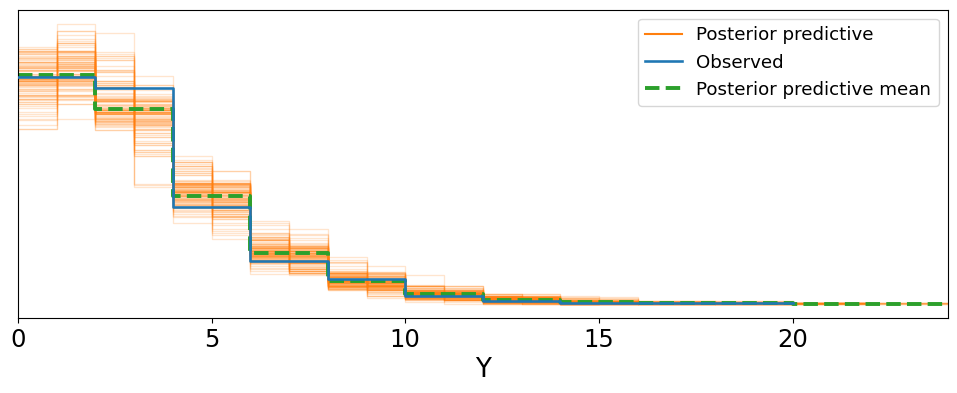

In [57]:
pm.sample_posterior_predictive(nb_data, model=model_valHalfStudentT, extend_inferencedata=True)
ppc = az.plot_ppc(nb_data, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C2"])
ppc.set_xlim(0, 24)

array([<Axes: >], dtype=object)

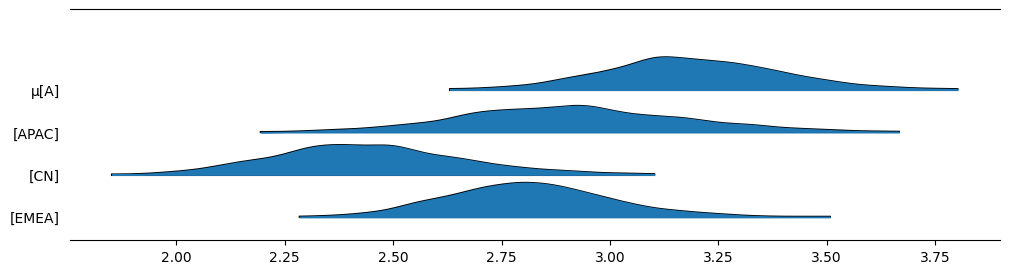

In [58]:
az.plot_forest(nb_data, var_names=['μ'], combined=True, figsize=(12, 3), kind = 'ridgeplot', hdi_prob=0.998)

This is a lot better because at the ppm the right end's match up and it captures the beginning of the observed relatively well.

# Hierarchical

In [59]:
with pm.Model(coords=reg_coords_new) as reg_model:

  ν = pm.Uniform('ν', lower = 5., upper = 10.)
  σ = pm.Logistic('σ', mu = 4., s = .5)

  μ_p = pm.HalfStudentT('μ_p', nu= ν, sigma= σ, dims="reg")  # Use sigma instead of nu

  θ = pm.Poisson('θ', mu = μ_p[reg_idx], observed = all_players['First Kills'].values)

  p_h_data = pm.sample()

Output()

Output()

Output()

(0.0, 20.0)

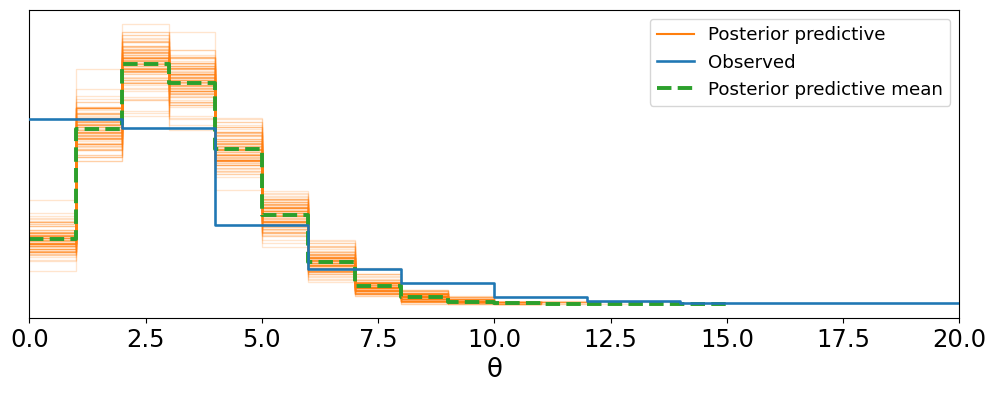

In [60]:
pm.sample_posterior_predictive(p_h_data, model=reg_model, extend_inferencedata=True)

az.plot_ppc(p_h_data, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C2"]).set_xlim(0,20)

Again poisson doesn't line up well as it takes a parabolic shape. Probably because of how strong my priors are andd because of the fact we are taking in a single variable. But lets see how the plots look

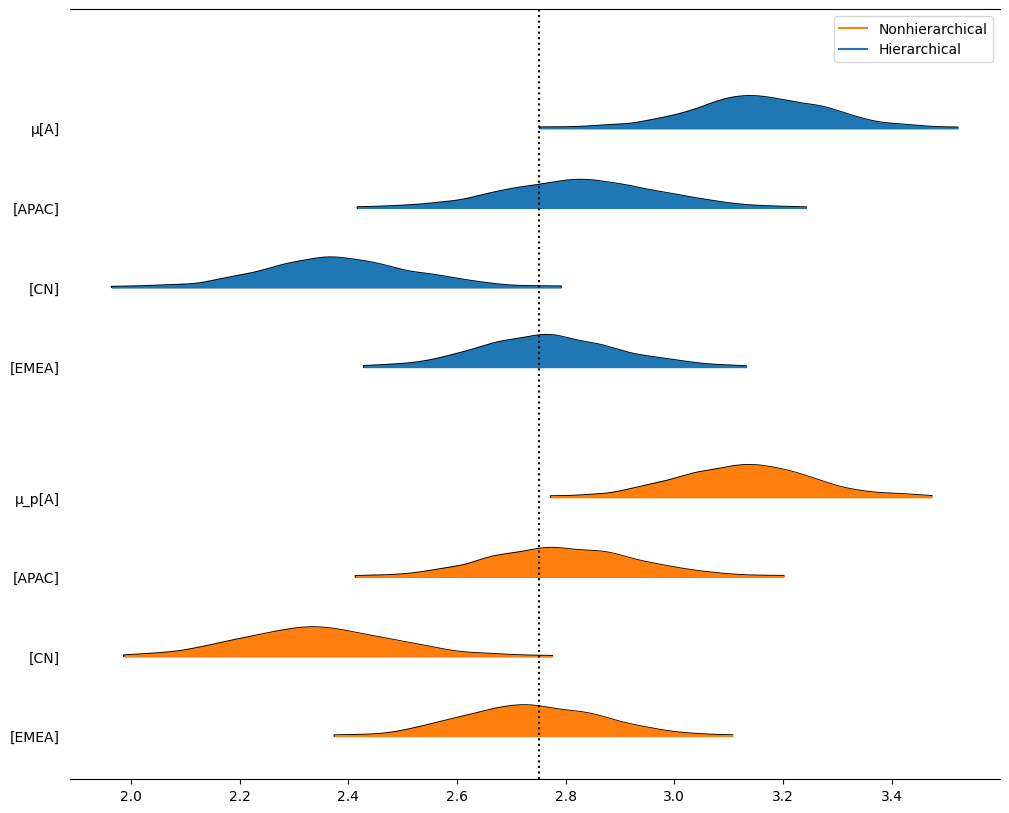

In [61]:
axes = az.plot_forest([p_data, p_h_data], kind="ridgeplot",
                      model_names=['Hierarchical', 'Nonhierarchical'],
                      var_names=['μ','μ_p'], combined=True, figsize=(12, 10),hdi_prob=0.997)
y_lims = axes[0].get_ylim()
axes[0].vlines(p_h_data.posterior['μ_p'].mean(), *y_lims, color="k", ls=":");

<xarray.Dataset> Size: 112B
Dimensions:  (reg: 4)
Coordinates:
  * reg      (reg) <U4 64B 'A' 'APAC' 'CN' 'EMEA'
Data variables:
    μ_p      (reg) float64 32B 1.001 1.0 1.002 1.0
    ν        float64 8B 0.9997
    σ        float64 8B 0.9999

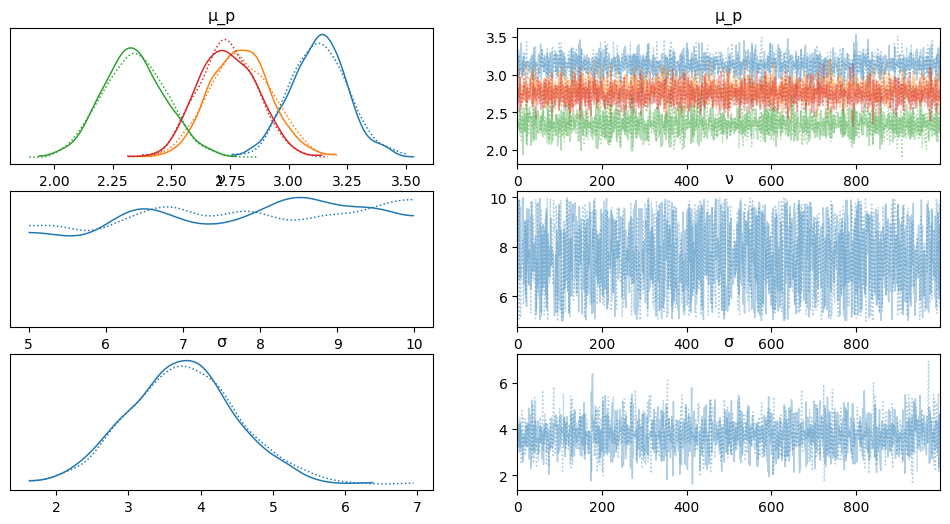

In [62]:
az.plot_trace(p_h_data)
az.rhat(p_h_data)

Nothing stikes out as apparantly bad for my rhat values as they are between 1 and 1.01. The amplitudes match up a lot of the time but the sigma values has some outliers where the amplitutdes don't match. I think my negative binomial should look better

For this one I used the same HalfStudentT Non-Hierarchical to represent my mu hyperpriors and priors. To represent the alpha i yoinked the same one in the notes by using an exponential but I changed the lam to make it so earlier values around 0-2 are more likely but theres a possiblity of getting larger values of like 5.

In [63]:
with pm.Model(coords=reg_coords_new) as reg_model:

    μ_ = pm.Logistic('μ_', mu = 4., s = .5, dims = "reg")

    σ = pm.Gamma('σ', alpha = 6., beta = 4., dims = "reg")

    μ_p = pm.HalfStudentT('μ_p', nu= μ_, sigma= σ, dims="reg")
    α_p = pm.Exponential('α_p', lam = .33, dims = "reg")

    θ = pm.NegativeBinomial('θ', mu = μ_p[reg_idx], alpha = α_p[reg_idx], observed = all_players['First Kills'].values)

    nb_h_data = pm.sample(target_accept = .95)

Output()

Output()

ERROR:pymc.stats.convergence:There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


Output()

(0.0, 20.0)

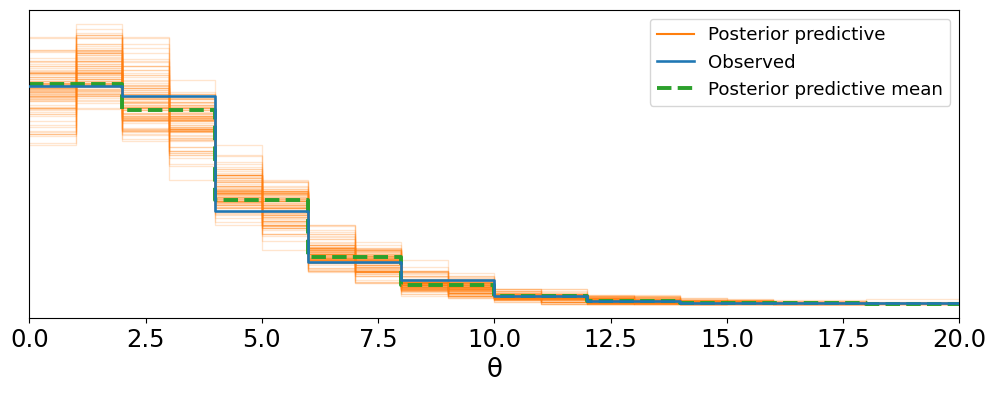

In [64]:
#ppc for the normal one
pm.sample_posterior_predictive(nb_h_data, model=reg_model, extend_inferencedata=True)

az.plot_ppc(nb_h_data, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C2"]).set_xlim(0,20)

array([<Axes: >], dtype=object)

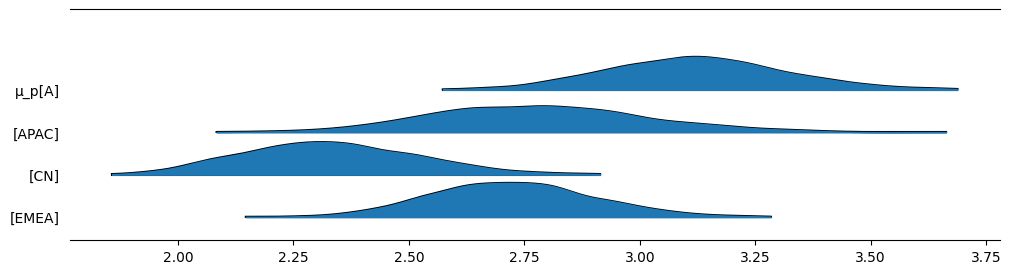

In [65]:
az.plot_forest(nb_h_data, var_names=['μ_p'], combined=True, figsize=(12, 3), kind = 'ridgeplot', hdi_prob=0.998)

<xarray.Dataset> Size: 192B
Dimensions:  (reg: 4)
Coordinates:
  * reg      (reg) <U4 64B 'A' 'APAC' 'CN' 'EMEA'
Data variables:
    α_p      (reg) float64 32B 1.002 0.9992 1.0 1.003
    μ_       (reg) float64 32B 1.001 1.004 0.9995 1.002
    μ_p      (reg) float64 32B 1.001 0.9996 1.0 0.9996
    σ        (reg) float64 32B 1.0 1.0 0.9997 1.004

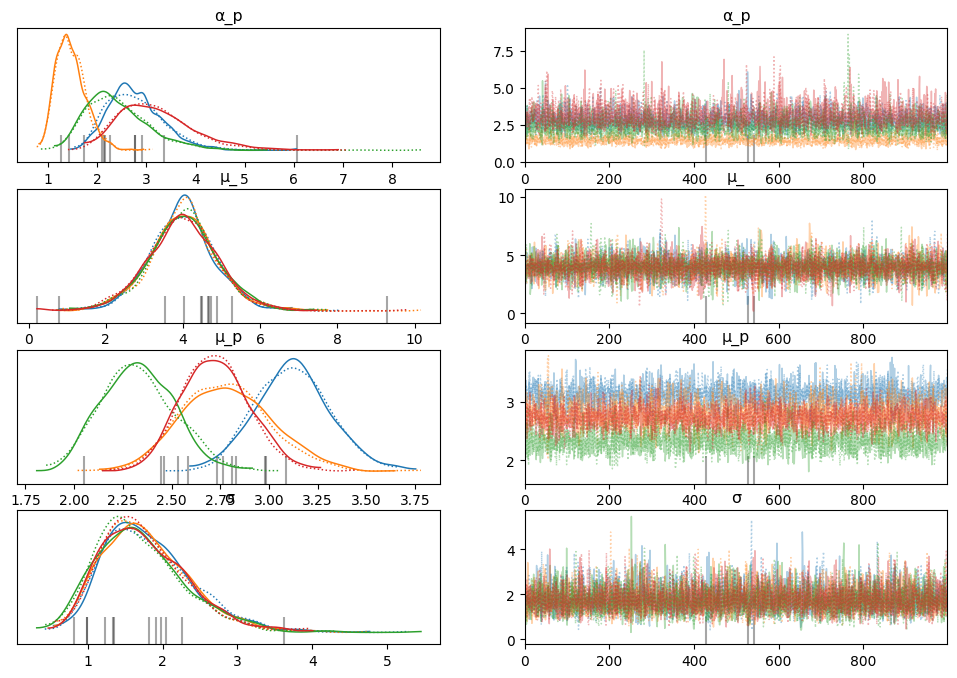

In [66]:
az.plot_trace(nb_h_data)
az.rhat(nb_h_data)

For this the rhat values are good as they are all around 1. The trace looks good as the posterior on the left have shapes and peaks that make sense. The right has no apparant outliers with spikes or deviations other than for the EMEA region which makes sense because from personal knowledge I know that the teams in EMEA game plan really well, so they can be really agressive some games. They got the record for most amount of first kills in a game as they're that aggressive.

# Conclusions

So I made a Poisson and NegativeBinomial nonhierarchical and hierarchical models. I want to compare NegativeBinomial because it has a better ppc compared to Poisson. Also when considered the definition of negativebinomial when utilizing a mu and alpha parameterization it makes sense logically for the context of my data.

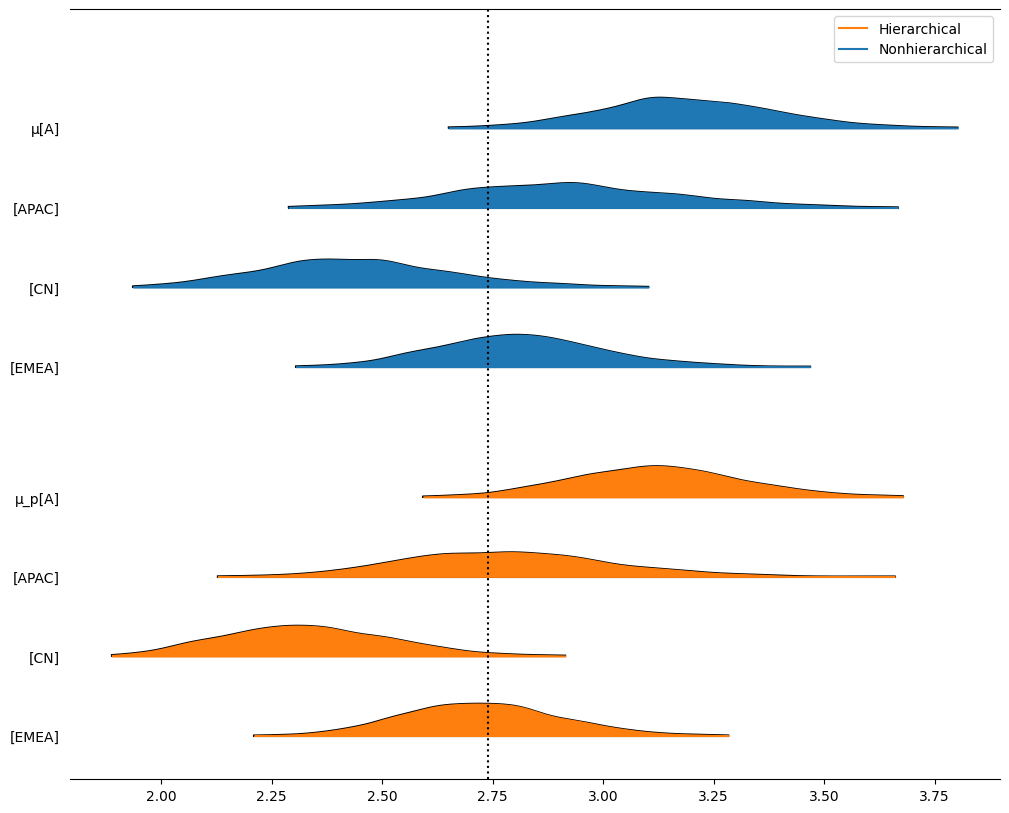

In [67]:
axes = az.plot_forest([nb_data, nb_h_data], kind="ridgeplot",
                      model_names=['Nonhierarchical', 'Hierarchical'],
                      var_names=['μ','μ_p'], combined=True, figsize=(12, 10),hdi_prob=0.997)
y_lims = axes[0].get_ylim()
axes[0].vlines(nb_h_data.posterior['μ_p'].mean(), *y_lims, color="k", ls=":");

First thing that I am noticing is that for APAC and EMEA the hierarchical data shifts the peak to make it more closely aligned with the mean. For the 2 other regions of Americas and China the peaks don't shift that much, but they become slightly more flat in the Negative Binomial model.

In terms of our data the first thing that I can draw is that our model is saying the mean is roughly 2.75 first kills. In my opinion I found this to be a lot higher than what I actullay believed as in Valorant the main person getting first kills is the duelist, but theres normally only 1 or 2 duelists in a team. So I thought the mean would be a lot lower.

Interestingly EMEA fits that mean the best. EMEA is centered nicely around the mean so they could be suggesting that the EMEA playstyle is less traditionaly role based and more individual players doing what they want as that could explain it has a big peak and low range in comparison to the other regions.

The next thing that I found interesting was that Americas peak is at a larger first kill value than all other regions which tracks as in this tournament the team that won was an American team. Based on tournament results the numbers make sense as CN was a pretty bummy region that year, they didn't make it past the group stage. And APAC had lots of dookie teams but also insanely cracked ones which is representative of the variance present.

I think overall the regions are pretty similar in first kills as the they all have peaks that are roughly .5 away from the mean. Another thing I noticed was that the hierarchical seemed to reduce the variance so its better than the non-hierarchical.

So my question of do different valorant pro regions first kills relate to each other is going to be probably yes. First the hierarchical was a better model than the non and since hierarchical is literally showing that regions are related it helps build the case that they do relate to each other. Also the strategy in valorant was pretty stagnant during this time so each region using the same strategy would be reflected in the first kills showing that they do relate to each other.

thanks for reading!